## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
# Instalando biblioteca com módulos de visualização
!pip install util-gfsilveira

In [2]:
# Instalando biblioteca com módulos de visualização das árvores
!pip install dtreeviz

In [3]:
# Importando bibliotecas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from util import printLis

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import dtreeviz

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [4]:
# Instanciando a lista de colunas da base
colunas = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]

In [5]:
# Importando a base de dados
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(
                      data_url,
                      sep="\s+",
                      skiprows=22,
                      header=None
                    )

X = pd.DataFrame(
                  np.hstack([boston.values[::2, :], boston.values[1::2, :2]]),
                  columns=colunas[:-1]
                )
y = pd.DataFrame(
                  boston.values[1::2, 2],
                  columns=[colunas[-1]]
                )

print("Explicativas")
display(X.head())

print("\nDependente")
display(y.head())

Explicativas


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33



Dependente


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2




---



# 1 Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [6]:
# Removendo possíveis NaN do banco
X = X.dropna()

# Modificando as classes dos dados para int
X = X.astype({
    "CHAS": "int64",
    "RAD": "int64",
})

# Separando em teste e treino
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

# Instanciando os objetos com os algoritmos de árvores
arvore = DecisionTreeRegressor(random_state=123)
arvore_2 = DecisionTreeRegressor(random_state=123, max_depth=2)
arvore_8 = DecisionTreeRegressor(random_state=123, max_depth=8)

# Treinando os algoritmos
arvore.fit(x_train, y_train)
arvore_2.fit(x_train, y_train)
arvore_8.fit(x_train, y_train)

# Verificando as métricas de teste
mse = arvore.score(x_test, y_test)
mse2 = arvore_2.score(x_test, y_test)
mse8 = arvore_8.score(x_test, y_test)

template = "O R² da árvore com profundidade {0} é: {1:.2f}"

print("Teste")
print(template.format(arvore.get_depth(), mse).replace(".",","))
print(template.format(arvore_2.get_depth(), mse2).replace(".",","))
print(template.format(arvore_8.get_depth(), mse8).replace(".",","))

Teste
O R² da árvore com profundidade 19 é: 0,75
O R² da árvore com profundidade 2 é: 0,52
O R² da árvore com profundidade 8 é: 0,77


In [7]:
y_test_copy = y_test.copy()
y_test_copy['predict'] = arvore.predict(x_test)
y_test_copy['predict_2'] = arvore_2.predict(x_test)
y_test_copy['predict_8'] = arvore_8.predict(x_test)
y_test_copy.head()

,MEDV,predict,predict_2,predict_8
410,15.0,27.5,23.715657,20.946875
85,26.6,23.9,23.715657,26.605882
280,45.4,50.0,46.104348,50.000000
422,20.8,20.2,23.715657,21.050000
199,34.9,27.9,23.715657,28.200000


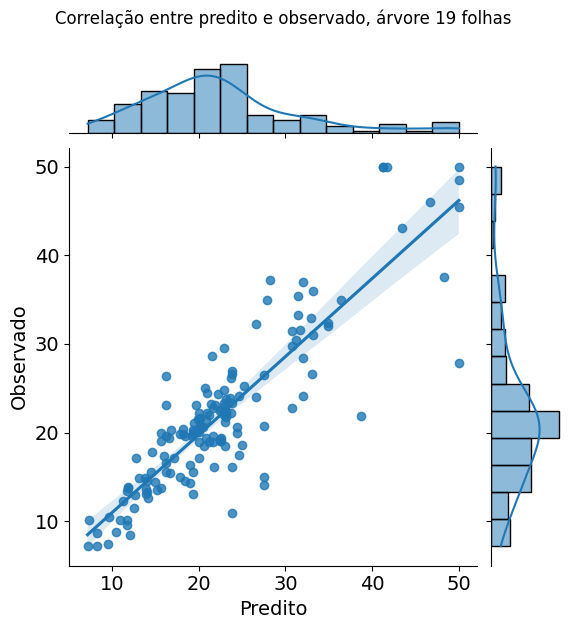

In [8]:
# Plotando a correlação entre predito e observado
sns.jointplot(
    x="predict",
    y="MEDV",
    kind="reg",
    data=y_test_copy
)

title = "Correlação entre predito e observado, árvore 19 folhas"
plt.suptitle(title, y=1.05, size=12)

plt.xlabel("Predito")
plt.ylabel("Observado")
plt.show()

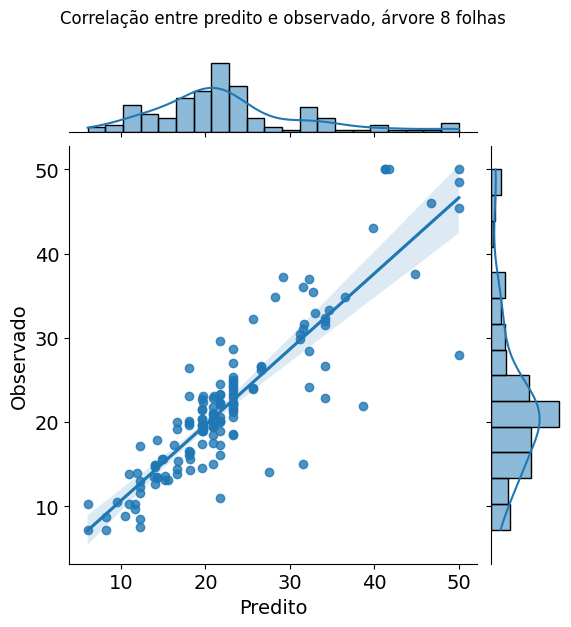

In [9]:
# Plotando a correlação entre predito e observado
sns.jointplot(
    x="predict_8",
    y="MEDV",
    kind="reg",
    data=y_test_copy
)

title = "Correlação entre predito e observado, árvore 8 folhas"
plt.suptitle(title, y=1.05, size=12)

plt.xlabel("Predito")
plt.ylabel("Observado")
plt.show()

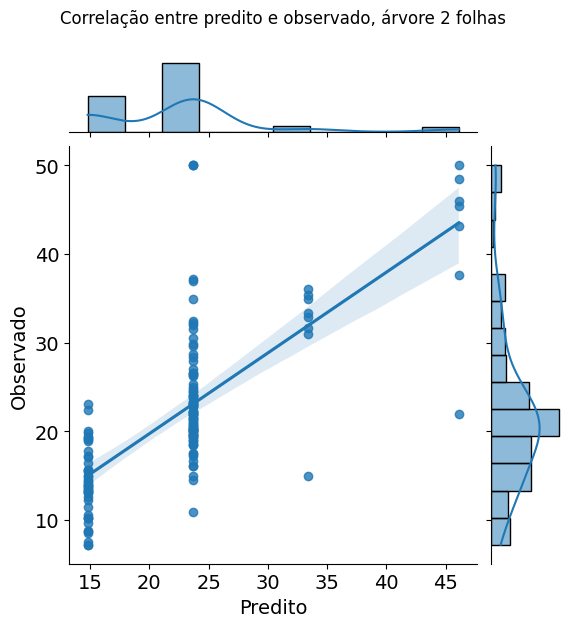

In [10]:
# Plotando a correlação entre predito e observado
sns.jointplot(
    x="predict_2",
    y="MEDV",
    kind="reg",
    data=y_test_copy
)

title = "Correlação entre predito e observado, árvore 2 folhas"
plt.suptitle(title, y=1.05, size=12)

plt.xlabel("Predito")
plt.ylabel("Observado")
plt.show()

## Conclusão

- Observa-se que o menor coeficiente de determinação foi obtido com a árvore de 2 folhas, e o maior foi obtido pela árvore de 8.
- Sem pré-pruning, foi obtida uma árvore com 19 folhas, tendo essa um coeficiente de determinação ligeiramente menor do que a árvore de 8 folhas.
- No gráfico de correlação, observamos que a árvore com mais folhas permite que os dados estejam mais dispersos, sendo o contrário, maior concentração, observado na árvore com menos folhas.



---



# 2  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

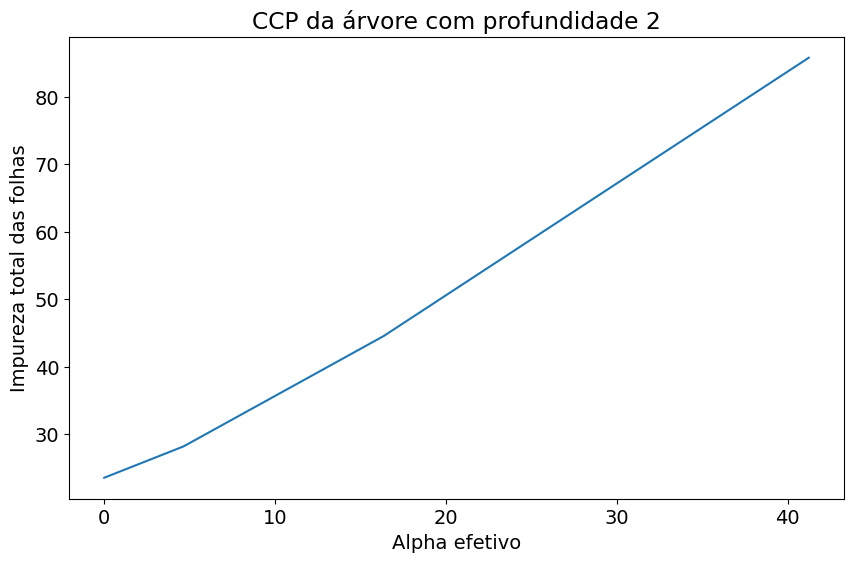

In [11]:
# Obtendo o caminho do CCP para árvore com profundidade 2
# Visualizando alphas e impurezas
path_2 = arvore_2.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas_2, impurities_2 = path_2.ccp_alphas, path_2.impurities

plt.figure(figsize=(10, 6))
plt.title("CCP da árvore com profundidade 2")
plt.plot(ccp_alphas_2, impurities_2)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")
plt.show()

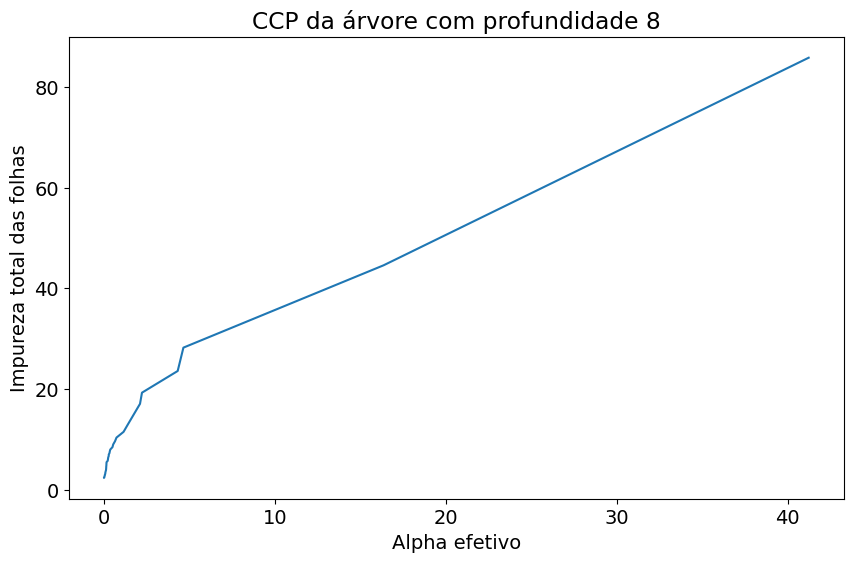

In [12]:
# Obtendo o caminho do CCP para árvore com profundidade 8
# Visualizando alphas e impurezas
path_8 = arvore_8.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas_8, impurities_8 = path_8.ccp_alphas, path_8.impurities

plt.figure(figsize=(10, 6))
plt.title("CCP da árvore com profundidade 8")
plt.plot(ccp_alphas_8, impurities_8)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")
plt.show()

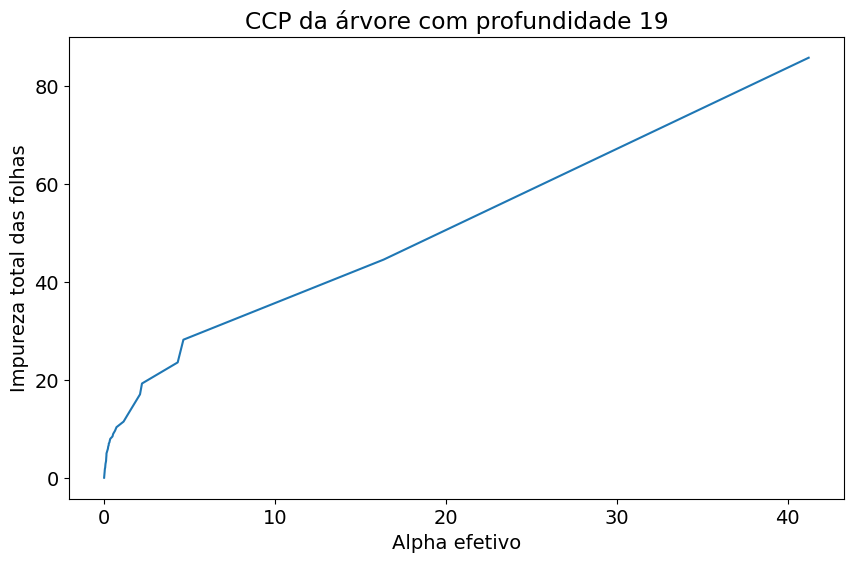

In [13]:
# Obtendo o caminho do CCP para árvore com profundidade 19
# Visualizando alphas e impurezas
path = arvore.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.title("CCP da árvore com profundidade 19")
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")
plt.show()

## Conclusão

- Os caminhos indicados pelo CCP-alpha das árvores com 8 e 19 folhas parece ser muito semelhante, com um aumento progressivo à partir do alpha 5, aproximadamente. Já na árvore com 2 folhas, isso ocorre desde o alpha 0.



---



# 3 Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [14]:
def treinamento_para_ccp_alpha(alpha: float) -> DecisionTreeRegressor:
  '''
    Função que determina instancia, treina e retorna um objeto
    DecisionTreeRegressor, com base em um alpha.
    :param alpha (float): Valor de impureza do Custo de Complexidade.
    :return clf (DecisionTreeRegressor): Arvore obtida com o alpha.
  '''
  clf = DecisionTreeRegressor(random_state=123, ccp_alpha=alpha)
  clf.fit(x_train, y_train)
  return clf

In [15]:
# Obtendo as árvores com os diferentes alpha
clfs = [treinamento_para_ccp_alpha(alpha) for alpha in ccp_alphas]
tree_depths = [clf.tree_.max_depth for clf in clfs]
len(tree_depths)

322

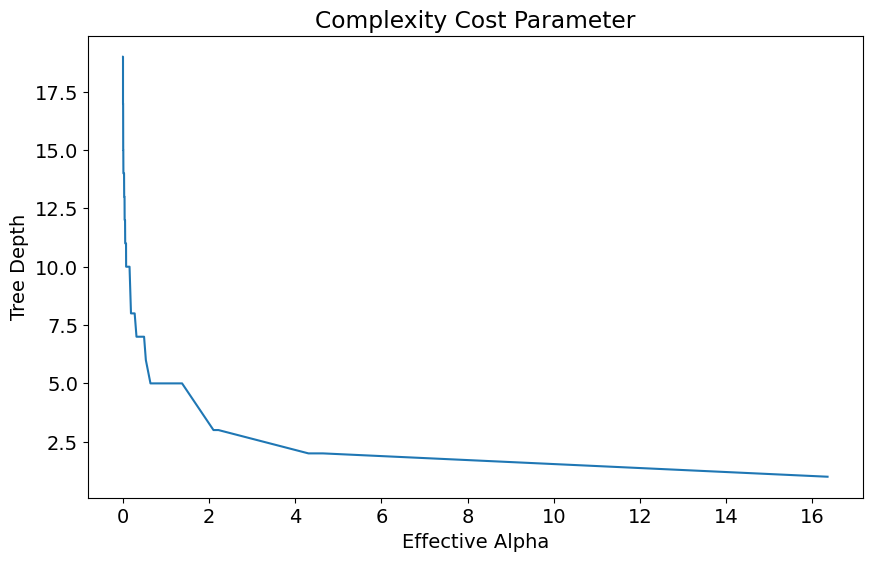

In [16]:
# Plot das profundidades das árvores
plt.figure(figsize=(10,  6))
plt.title("Complexity Cost Parameter")
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("Effective Alpha")
plt.ylabel("Tree Depth")
plt.show()

## Conclusão

- Optou-se por não faezer pré-pruning na árvore.
- Observa-se uma redução drástica na profundidade das árvores, ao utilizar alpha efetivo até 1, aproximadamente.
- Alpha efetivo entre 1 e 4, essa redução de profundidade fica menos acentuada.
- Acima de 4, a redução de folhas ainda ocorre, porém de forma mais discreta.



---



# 4 Para cada árvore na lista, calcule o MSE da árvore.

In [17]:
# Calculando o MSE de cada árvore, na base de treino e na base de test
train_scores = [mean_squared_error(y_train , clf.predict(x_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(x_test)) for clf in clfs]
print(f"O menor MSE obtido na base de treino foi: {min(train_scores):.2f}")
print(f"O menor MSE obtido na base de test foi: {min(test_scores):.2f}")

O menor MSE obtido na base de treino foi: 0.00
O menor MSE obtido na base de test foi: 15.46


## Conclusão

- Interessante observar a diferença, esperada, entre o MSE da base de teste e treino.



---



# 5 Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

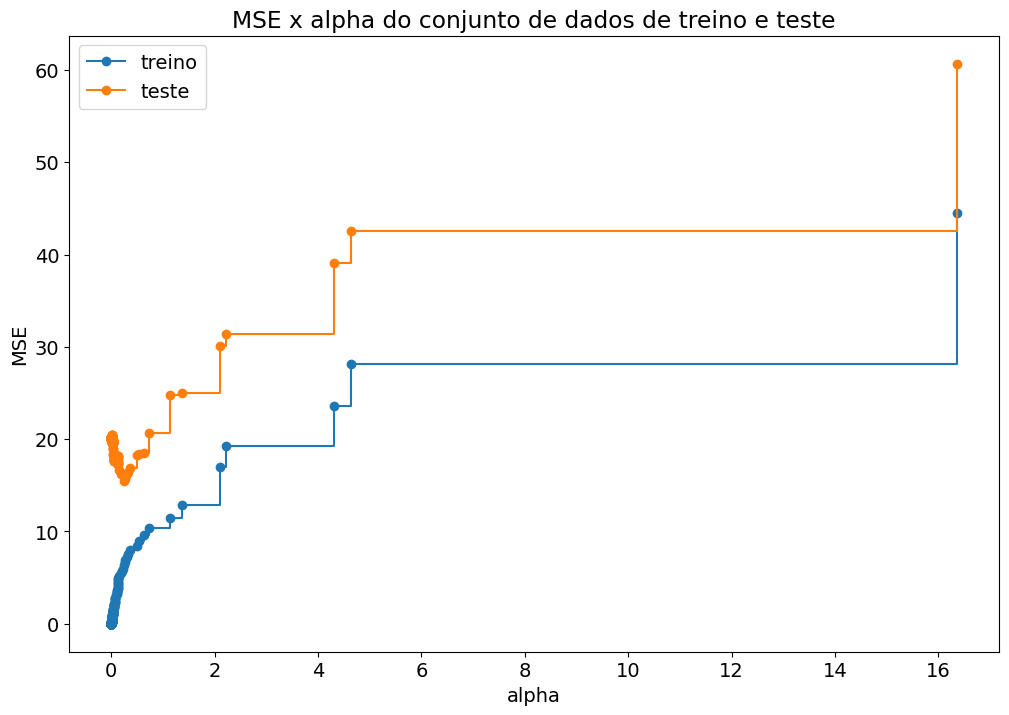

In [18]:
# Plotando o MSE pelo alpha de cada árvore obtida pelo pós-pruni
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(
  ccp_alphas[:-1],
  train_scores[:-1],
  marker='o',
  label="treino",
  drawstyle="steps-post"
)
ax.plot(
  ccp_alphas[:-1],
  test_scores[:-1],
  marker='o',
  label="teste",
  drawstyle="steps-post"
)
ax.legend()
plt.show()

In [19]:
# Obtendo o melhor MSE na base de teste
test_scores_index = test_scores.index(min(test_scores))
print(f"Alpha aplicado na árvore com o menor MSE: {ccp_alphas[test_scores_index]:.2f}")

Alpha aplicado na árvore com o menor MSE: 0.24


## Conclusão

- Observa-se na base de teste uma redução do MSE nas árvores obtidas aplicando alpha progressivamente até 0,24. Já na base de treino, ocorre aumento do MSE até o alpha 0,24.
- Acima desse valor de alpha, as métricas de MSE das árvores são equidistantes e homogêneas.



---



# 6 Calcule o R-quadrado dessa árvore encontrada no item acima

In [20]:
# Verificando as métricas de teste
alpha = ccp_alphas[test_scores_index]

clf_melhor_pruni = clfs[test_scores_index]
depth = clf_melhor_pruni.get_depth()

r_quad = clf_melhor_pruni.score(x_test, y_test)

mse = min(test_scores)

print(f"Alpha: {alpha:.2f}")
print(f"Depth: {depth}")
print(f"R²: {r_quad:.2f}")
print(f"MSE: {mse:.2f}")

Alpha: 0.24
Depth: 8
R²: 0.81
MSE: 15.46


## Conclusão

- O menor MSE foi de 15,46 na base de test, quando aplicou-se um aplha de 0,24, o que resultou em uma árvore de 8 folhas, que apresenta um coeficiente de determinação de 0,81.



---



# 7 Visualize esta árvore.

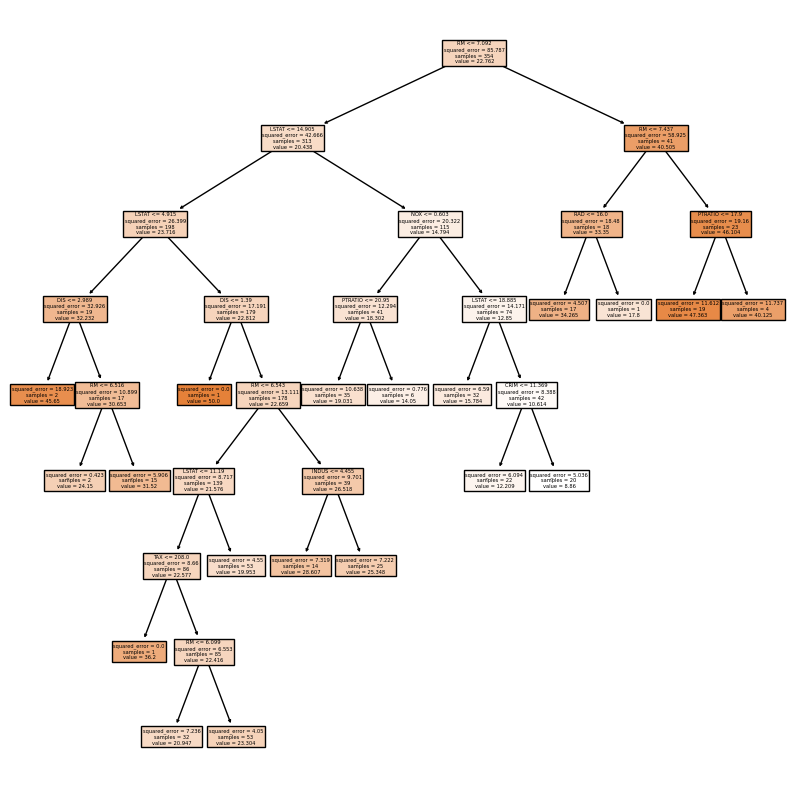

In [21]:
# Plote da árvore com profundidade 2
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(
    clf_melhor_pruni,
    feature_names=X.columns,
    filled=True
)

In [22]:
# Verificando as colunas
printLis(X.columns)

-------------
-=< Lista >=-
-------------
0 -> CRIM
1 -> ZN
2 -> INDUS
3 -> CHAS
4 -> NOX
5 -> RM
6 -> AGE
7 -> DIS
8 -> RAD
9 -> TAX
10 -> PTRATIO
11 -> B
12 -> LSTAT


In [23]:
# Verificando a árvore com o menor MSE
representacao_textual = tree.export_text(clf_melhor_pruni)
print(representacao_textual)

|--- feature_5 <= 7.09
|   |--- feature_12 <= 14.91
|   |   |--- feature_12 <= 4.91
|   |   |   |--- feature_7 <= 2.99
|   |   |   |   |--- value: [45.65]
|   |   |   |--- feature_7 >  2.99
|   |   |   |   |--- feature_5 <= 6.52
|   |   |   |   |   |--- value: [24.15]
|   |   |   |   |--- feature_5 >  6.52
|   |   |   |   |   |--- value: [31.52]
|   |   |--- feature_12 >  4.91
|   |   |   |--- feature_7 <= 1.39
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_7 >  1.39
|   |   |   |   |--- feature_5 <= 6.54
|   |   |   |   |   |--- feature_12 <= 11.19
|   |   |   |   |   |   |--- feature_9 <= 208.00
|   |   |   |   |   |   |   |--- value: [36.20]
|   |   |   |   |   |   |--- feature_9 >  208.00
|   |   |   |   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |   |   |   |--- value: [20.95]
|   |   |   |   |   |   |   |--- feature_5 >  6.10
|   |   |   |   |   |   |   |   |--- value: [23.30]
|   |   |   |   |   |--- feature_12 >  11.19
|   |   |   |   |   |   |--- valu

## Conclusão.

- Assim como na árvore de profundidade 2 e na de profundidade 8 com pré-pruning, obtidas no exercício anterior, aqui, usando alpha de 0,24, obteve-se uma árvore de profundidade 8, sendo novamente as variáveis **RM** (número médio de quartos por habitação) e **LSTAT** (porcentagem do status inferior da população), as informações com maior pode preditivo.



---

